In [1]:
import os 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import splitfolders


import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D, BatchNormalization,Input,concatenate
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam


In [26]:
# Path where our data is located
base_path = "C:/Users/Dell/Downloads/GSASLdatasets/train/"

# Dictionary to save our 29 classes
categories = {  0: "A",
                1: "B",
                2: "C",
                3: "D",
                4: "E",
                5: "F",
                6: "G",
                7: "H",
                8: "I",
                9: "J",
                10: "K",
                11: "L",
                12: "M",
                13: "N",
                14: "O",
                15: "P",
                16: "Q",
                17: "R",
                18: "S",
                19: "T",
                20: "U",
                21: "V",
                22: "W",
                23: "X",
                24: "Y",
                25: "Z",
                26: "del",
                27: "nothing",
                28: "space",
            }

def add_class_name_prefix(df, col_name):
    df[col_name]
    return df


# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + categories[category])
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename")

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [27]:
df


filename  category
0      bw_X2257.jpg        23
1      bw_R1251.jpg        17
2      bw_S2004.jpg        18
3      bw_M1244.jpg        12
4      bw_K1805.jpg        10
...             ...       ...
69595  bw_C2989.jpg         2
69596   bw_Y142.jpg        24
69597  bw_Q1582.jpg        16
69598  bw_F1503.jpg         5
69599    bw_S71.jpg        18

[69600 rows x 2 columns]

In [28]:
df.shape

(69600, 2)

In [4]:
print("number of elements = ", len(df))


number of elements =  87000


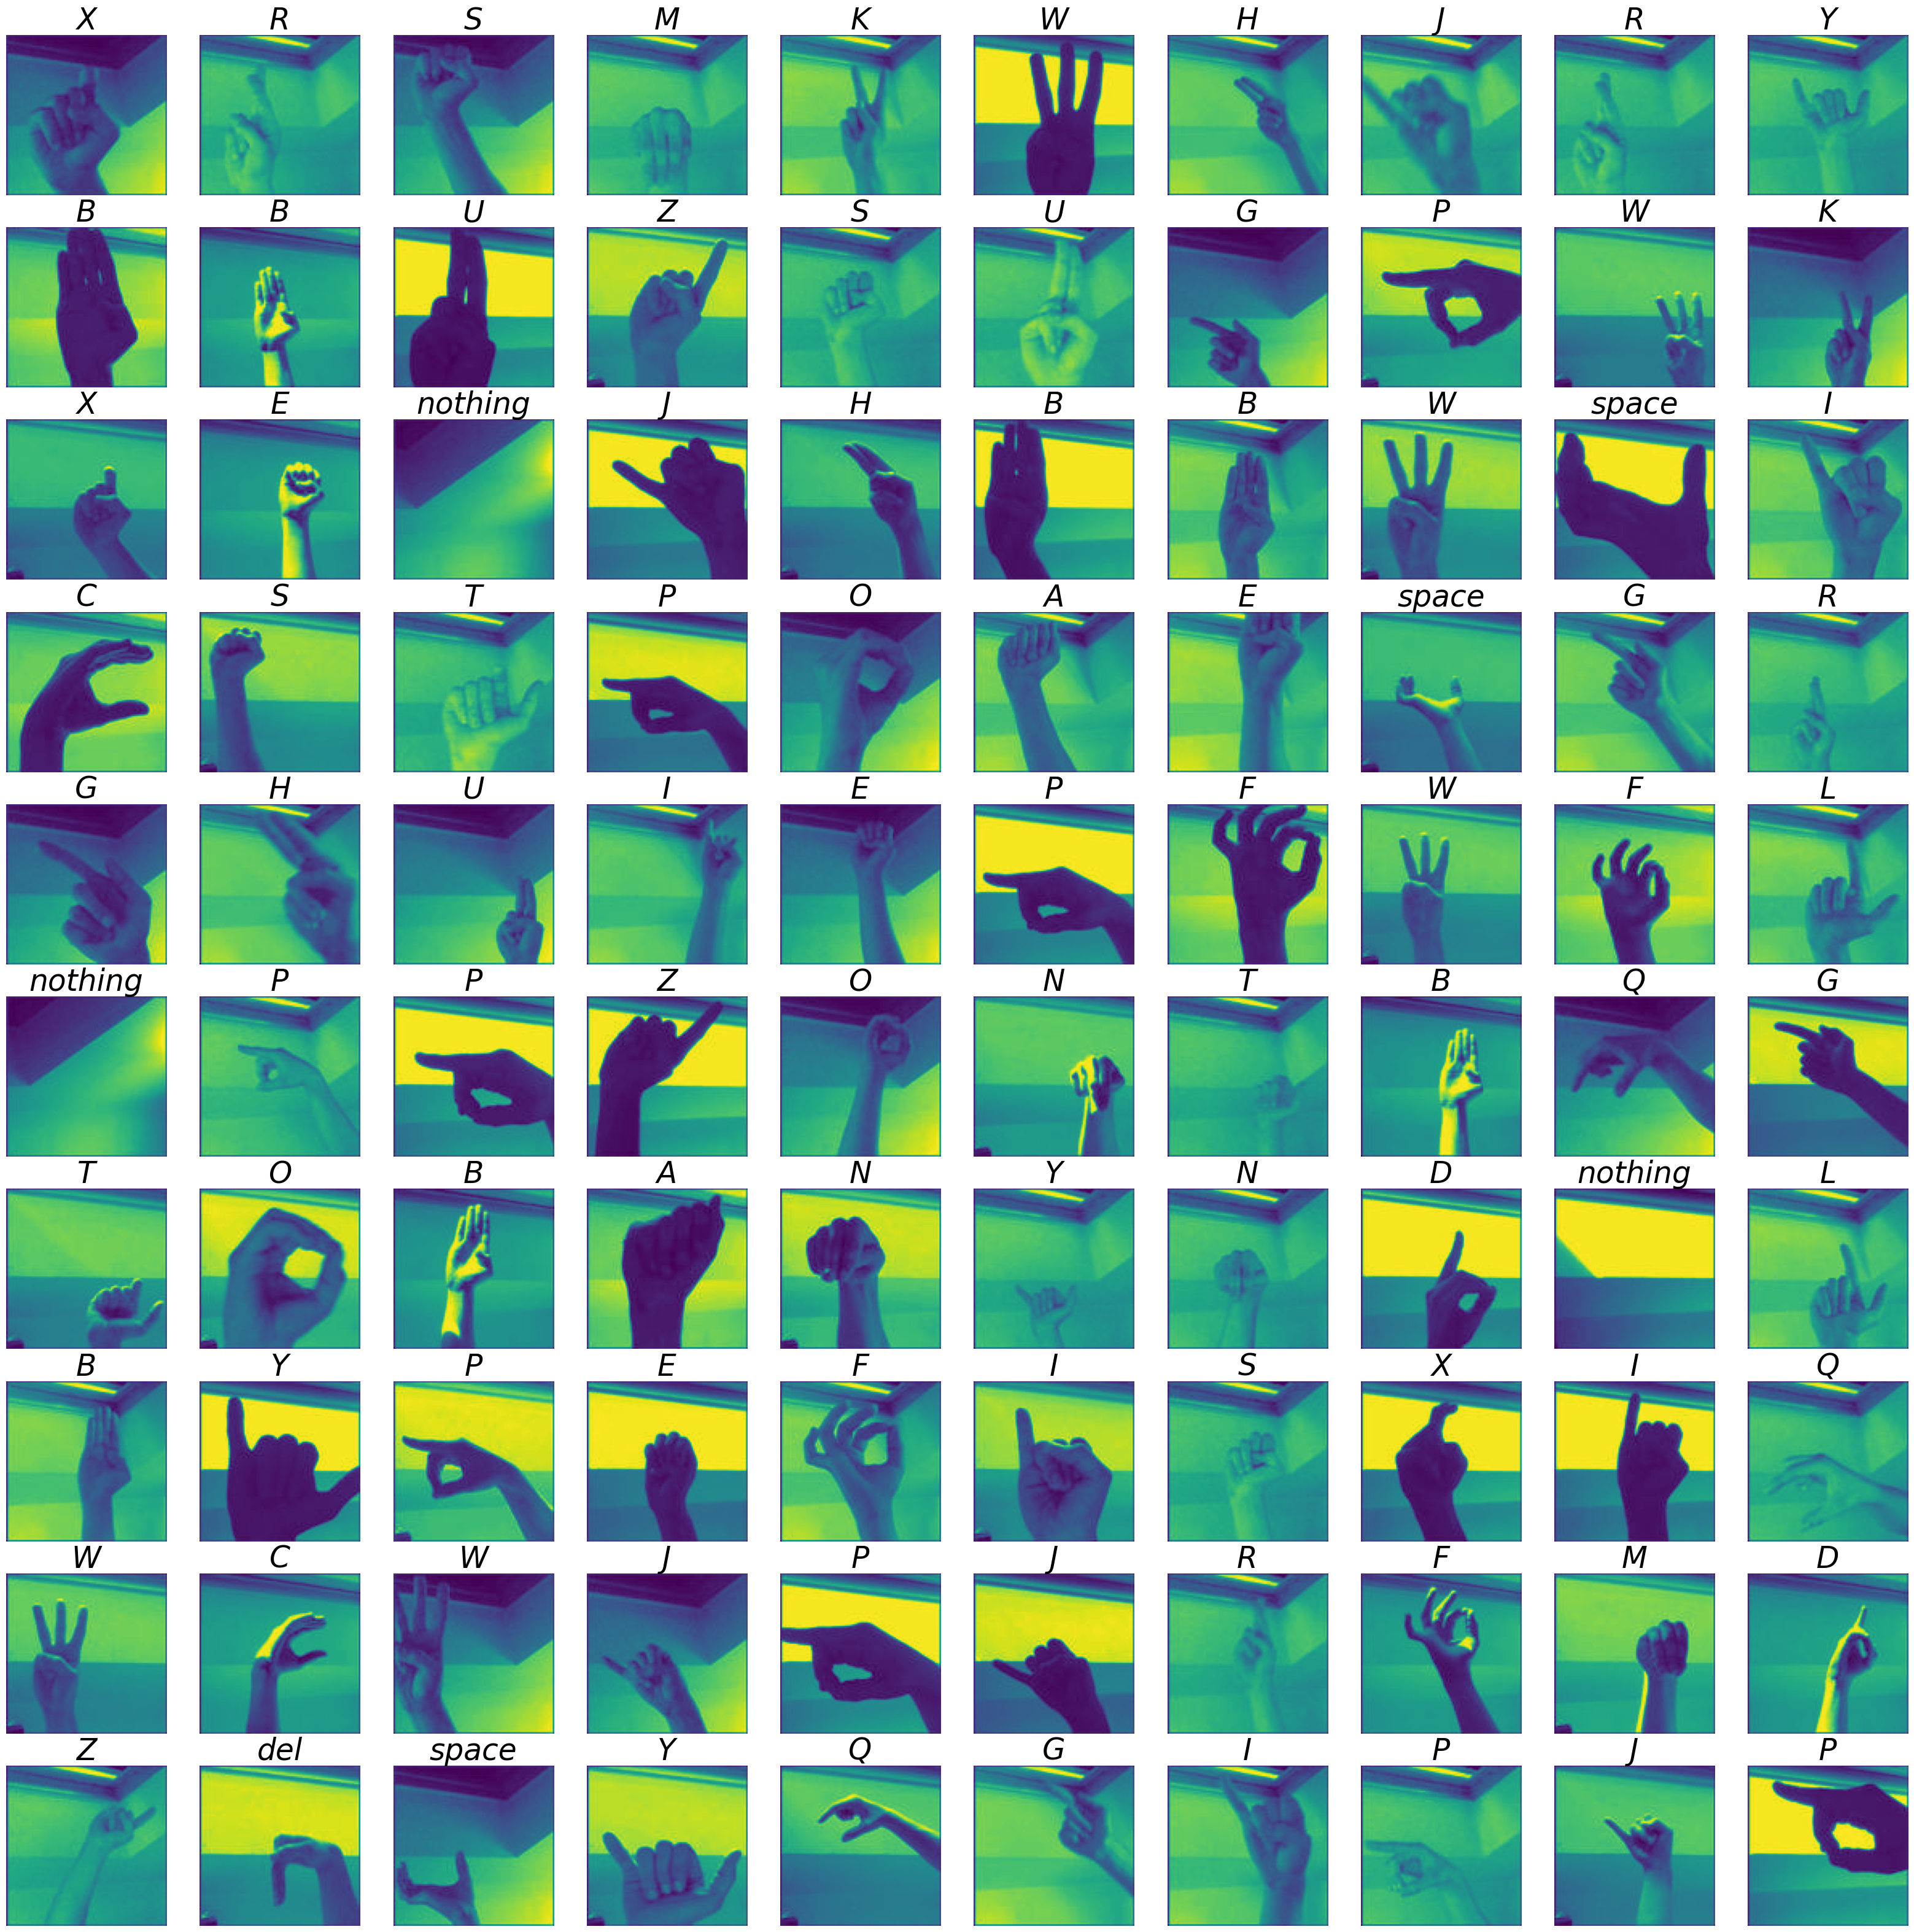

In [29]:
plt.figure(figsize=(40,40))

for i in range(100):
    path = ""
    path = os.path.join(base_path, categories[df.category[i]], df.filename[i])
    img = plt.imread(path)
    plt.subplot(10,10, i + 1)
    plt.imshow(img)
    plt.title(categories[df.category[i]],fontsize=35,fontstyle='italic')
    plt.axis("off")

In [6]:
splitfolders.ratio('C:/Users/Dell/Downloads/ASLresize/',output='C:/Users/Dell/Downloads/ASLdatasets/', seed=1333, ratio=(0.8,0.1,0.1))

Copying files: 87000 files [09:44, 148.92 files/s]


In [6]:
datagen = ImageDataGenerator(rescale=1.0 / 255,
                             rotation_range=15,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest')


In [43]:
train_path = 'C:/Users/Dell/Downloads/GSASLdatasets/train/'
val_path = 'C:/Users/Dell/Downloads/GSASLdatasets/val/'
test_path = 'C:/Users/Dell/Downloads/GSASLdatasets/test/'

# Define hyperparameters and parameters
batch_size = 32
image_size = 100
img_channel = 1
num_classes = 29
learning_rate = 0.05

In [44]:
train_data = datagen.flow_from_directory(directory=train_path,
                                         target_size=(image_size, image_size),
                                         batch_size=batch_size,
                                         class_mode='categorical')

val_data = datagen.flow_from_directory(directory=val_path,
                                       target_size=(image_size, image_size),
                                       batch_size=batch_size,
                                       class_mode='categorical')

test_data = datagen.flow_from_directory(directory=test_path,
                                        target_size=(image_size, image_size),
                                        batch_size=batch_size,
                                        class_mode='categorical',
                                        shuffle=False)

Found 69600 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [45]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(64, 3, activation='relu', padding='same', input_shape=(image_size, image_size, img_channel)))
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 100, 100, 64)      640       
                                                                 
 conv2d_33 (Conv2D)          (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 50, 50, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_26 (Dropout)        (None, 50, 50, 64)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 conv2d_35 (Conv2D)          (None, 50, 50, 128)       147584    
                                                      

In [46]:
# optimizer = Adam(learning_rate=learning_rate)
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, restore_best_weights=True, verbose=1)
reduce_learning_rate = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.6, verbose=1)


In [48]:
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=15,
                    callbacks=[early_stopping, reduce_learning_rate],
                    verbose=1)

Epoch 1/15


UnimplementedError: Graph execution error:

Detected at node sequential_6/conv2d_32/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\Dell\AppData\Local\Temp\ipykernel_16588\3420045448.py", line 1, in <module>

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1126, in train_step

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 589, in __call__

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 321, in call

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\activations.py", line 306, in relu

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5397, in relu

Fused conv implementation does not support grouped convolutions for now.
	 [[{{node sequential_6/conv2d_32/Relu}}]] [Op:__inference_train_function_14700]

In [15]:
model.save('GSASLmodel.h5')

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
# Evaluvate for train generator
from keras.models import load_model
model = load_model('C:/django/TheSilentVoice-signlanguagerecognition/signlanguage/model/ASLmodel.h5')
loss,acc = model.evaluate(train_data , verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_data, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 96.81752920150757
The Loss of the model for training data is: 0.09236235171556473
The accuracy of the model for validation data is: 96.54023051261902
The Loss of the model for validation data is: 0.09858692437410355


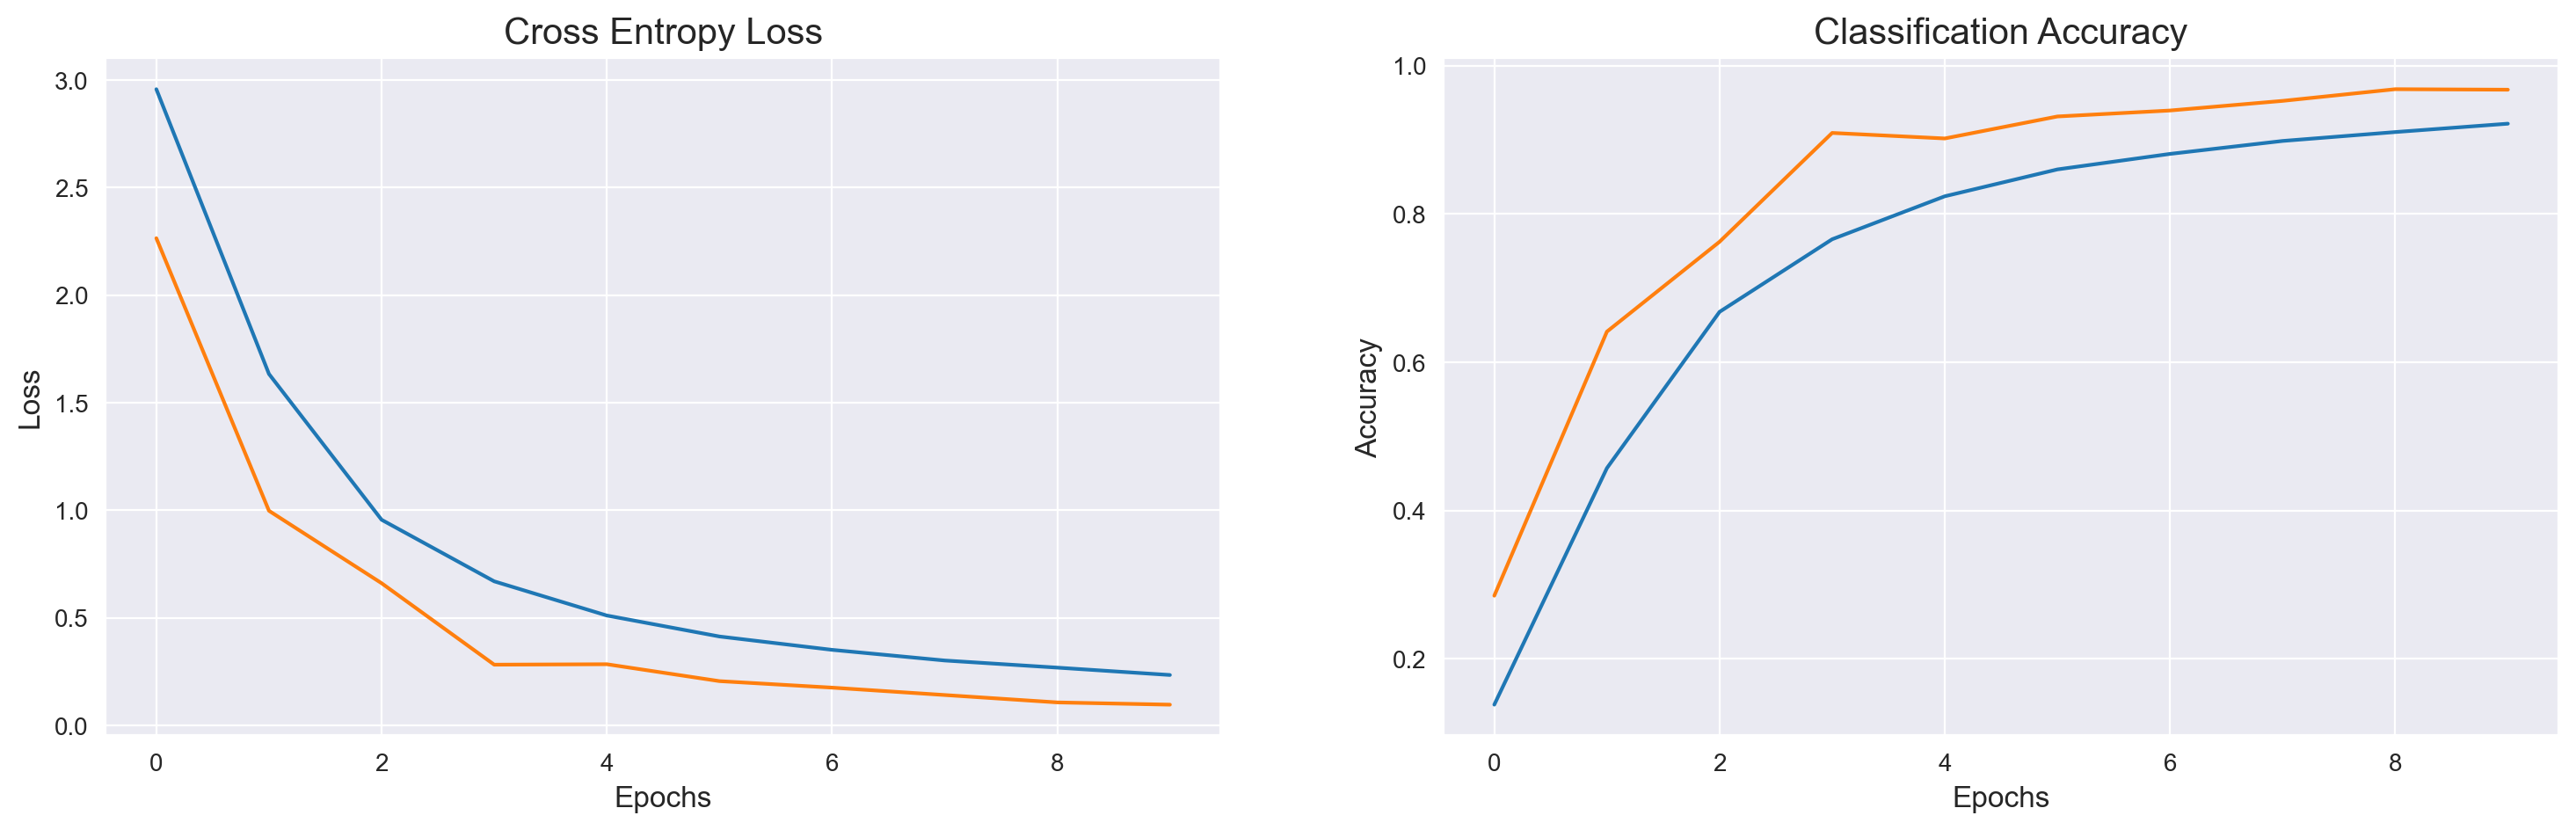

In [17]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(history.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [9]:
# prediction
result = model.predict(test_data,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_data.labels

# Evaluvate
loss,acc = model.evaluate(test_data,verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 96.35632038116455
The Loss of the model for testing data is: 0.10524008423089981


In [10]:

p = y_pred
y = y_true
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 8375
Incorrect predicted classes: 325


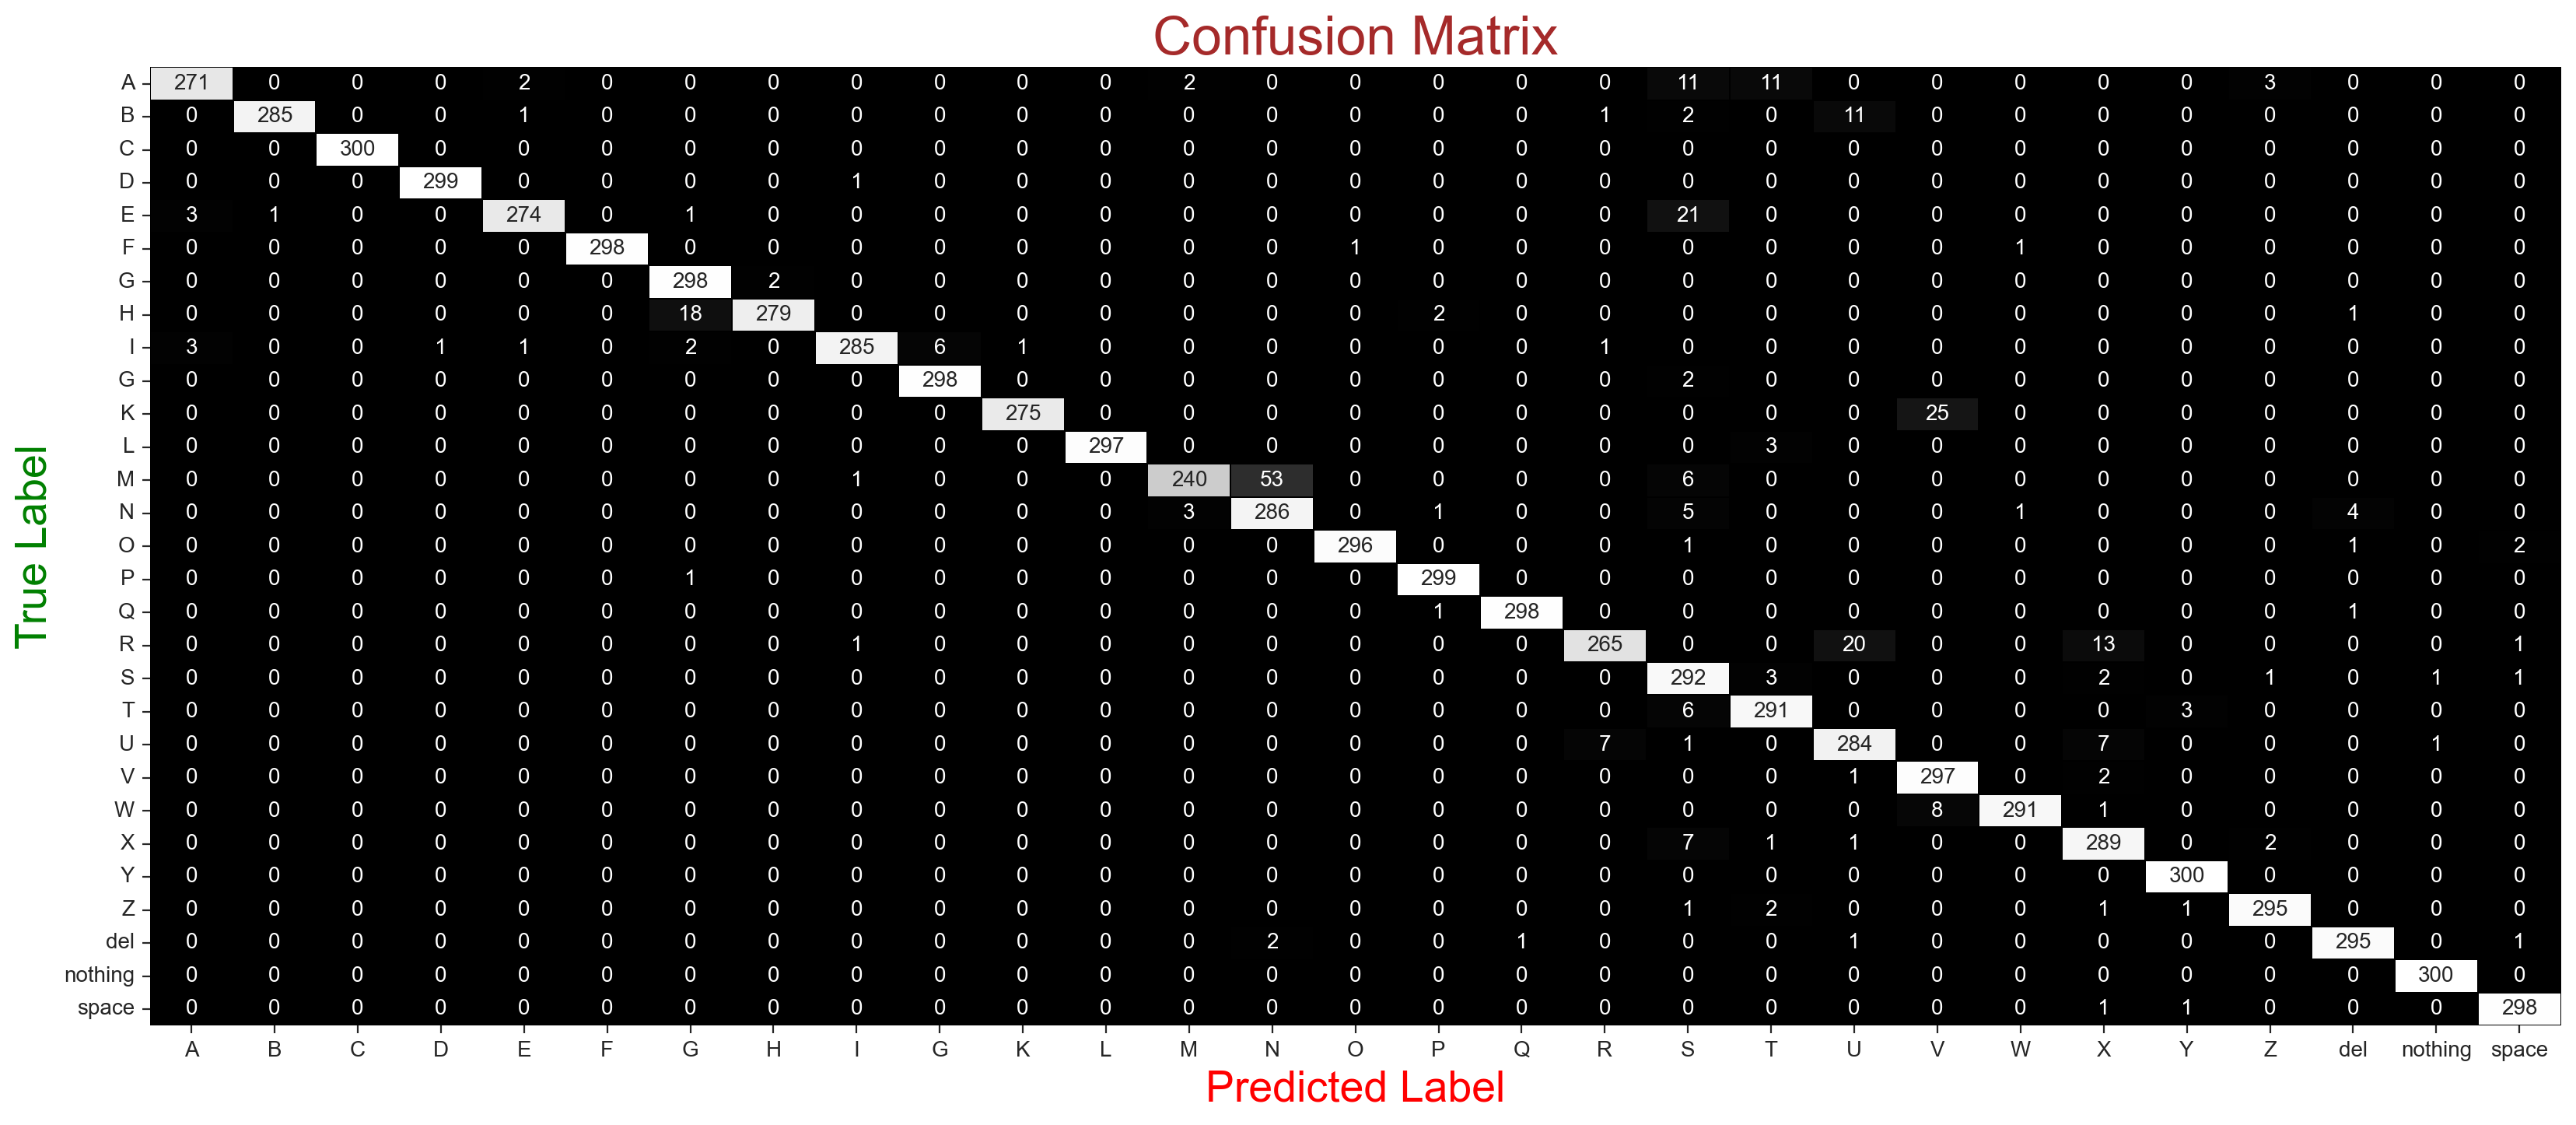

In [11]:
sns.set_style('ticks')

confusion_mtx = confusion_matrix(y_true,y_pred) 

f,ax = plt.subplots(figsize = (20,8),dpi=200)

sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.1, cmap = "gist_yarg_r", 
            linecolor="black", fmt='.0f', ax=ax, 
            cbar=False, xticklabels=categories.values(), 
            yticklabels=categories.values())

plt.xlabel("Predicted Label",fontdict={'color':'red','size':20})
plt.ylabel("True Label",fontdict={'color':'green','size':20})
plt.title("Confusion Matrix",fontdict={'color':'brown','size':25})

plt.show()

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.models import load_model
import numpy as np

model = load_model('C:/django/TheSilentVoice-signlanguagerecognition/signlanguage/model/ASLmodel.h5')
labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "G", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "del", "nothing", "space"]


In [14]:
img_path = "C:/Users/Dell/OneDrive/Desktop/o.jpg"
img = image.load_img(img_path, target_size=(100, 100))  # Adjust target_size as per your model's input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image data if necessary

In [15]:
predictions = model.predict(img_array)


1/1 [==============================] - 0s 60ms/step


In [16]:
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the class label associated with the predicted index
predicted_class_label = labels[predicted_class_index]
print("Predicted class:", predicted_class_label)

Predicted class: O


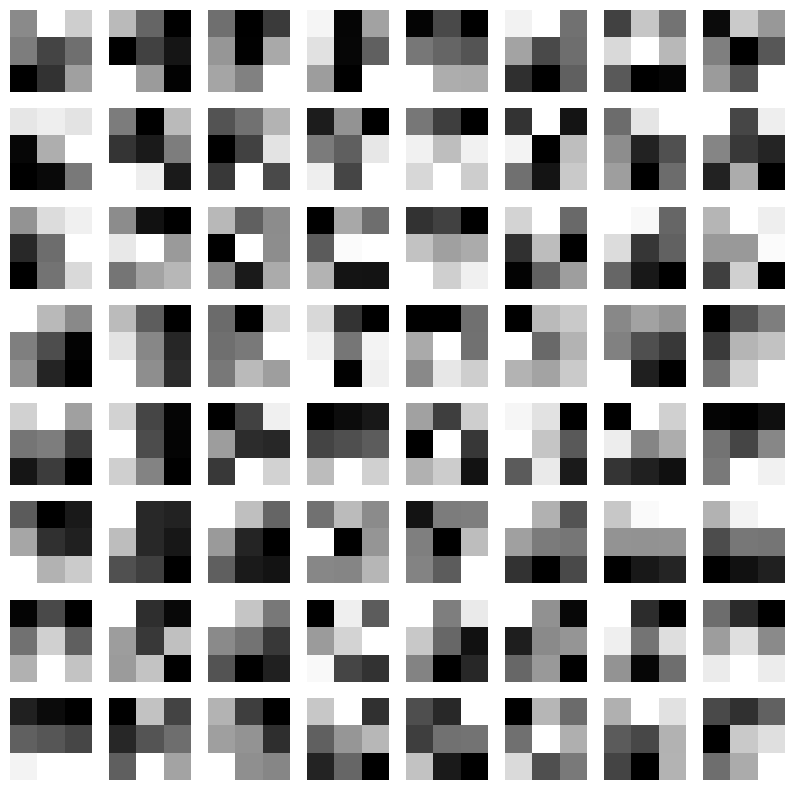

In [2]:
# Get the weights of the first convolutional layer
first_layer_weights = model.layers[0].get_weights()[0]

# Visualize filters
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(64):  # Assuming 64 filters in the first convolutional layer
    plt.subplot(8, 8, i+1)
    plt.imshow(first_layer_weights[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.show()


1/1 [==============================] - 0s 159ms/step


C:\Users\Dell\AppData\Local\Temp\ipykernel_13452\1084863399.py:38: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()


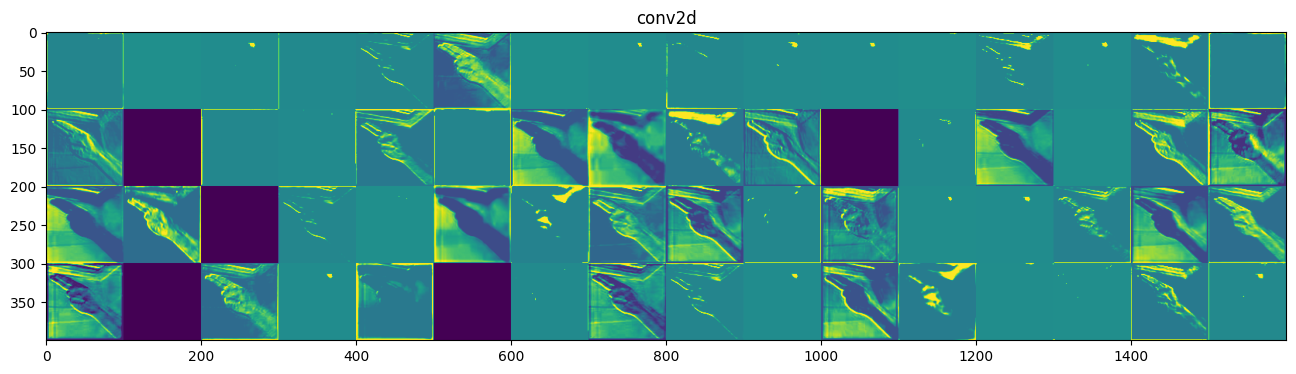

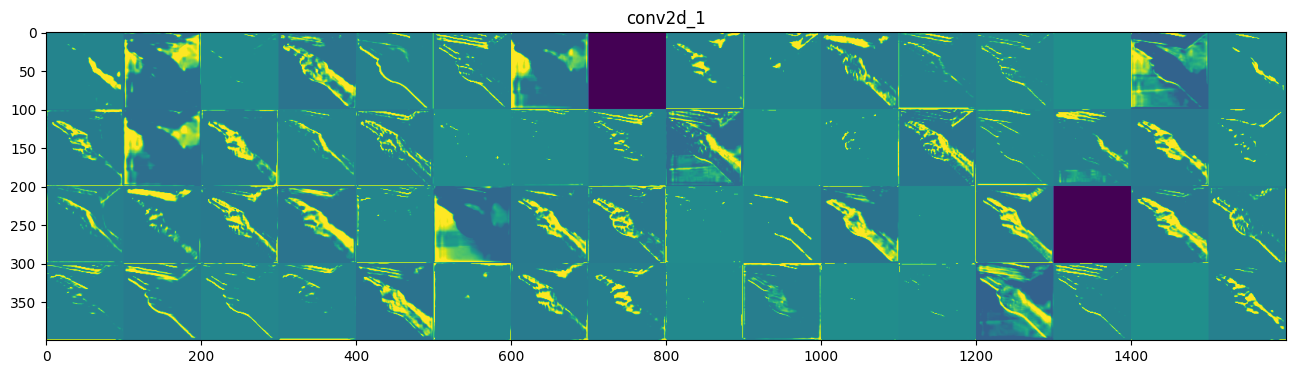

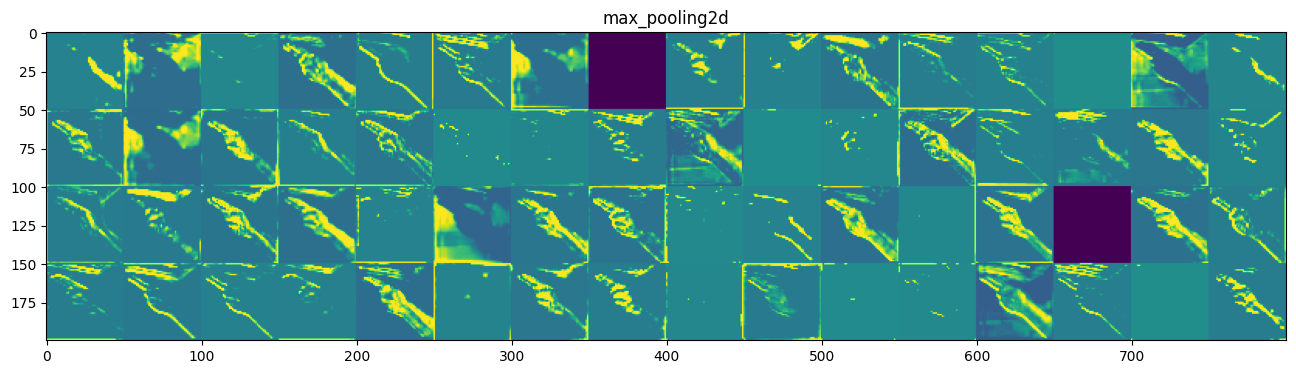

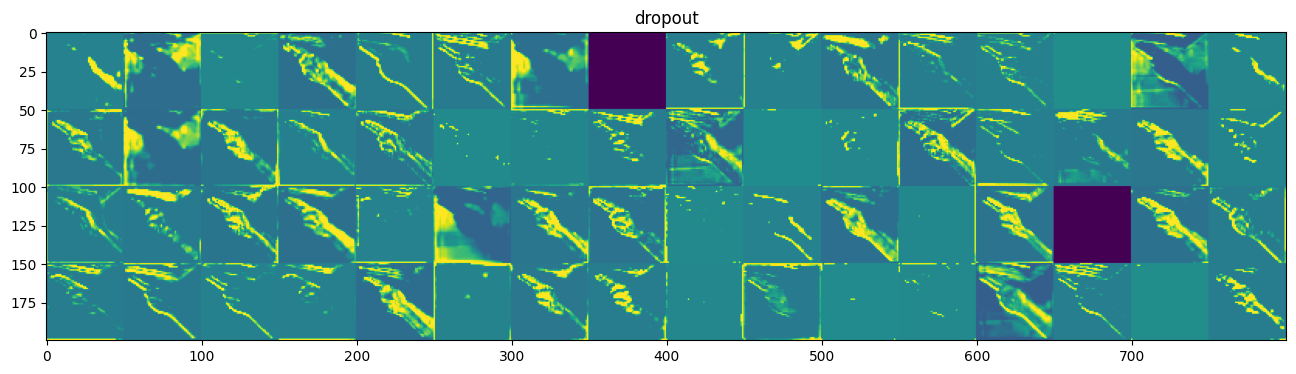

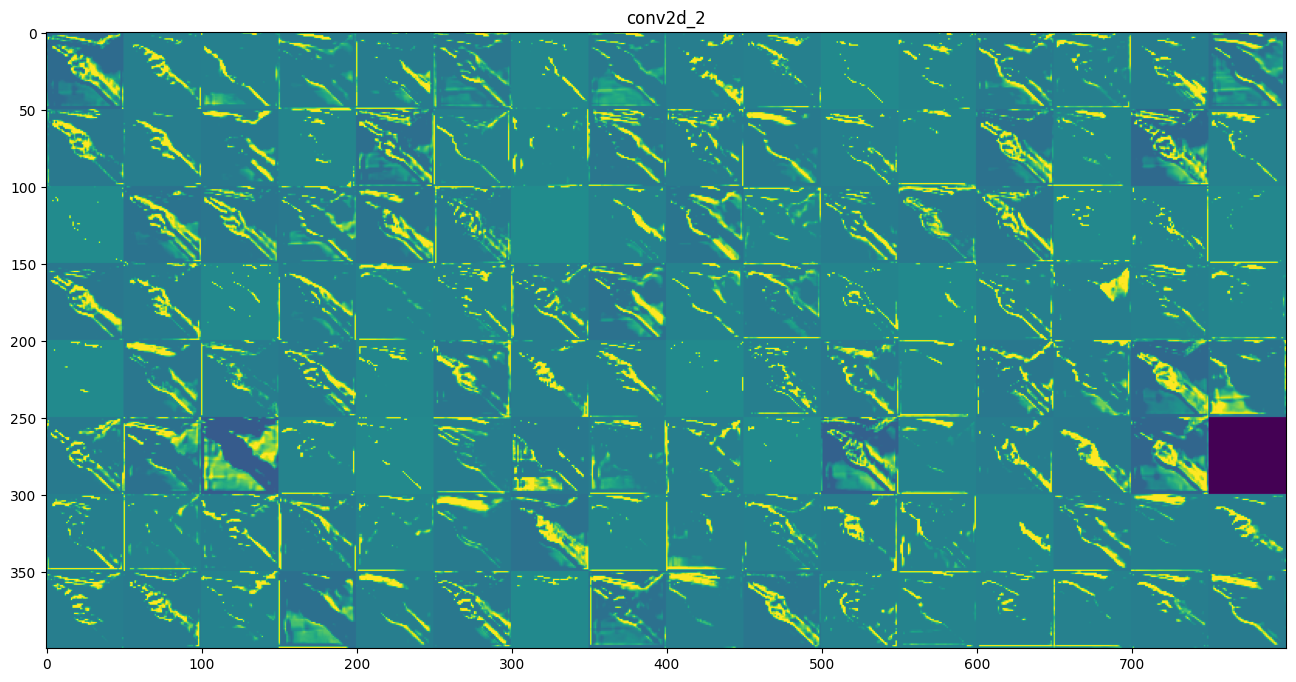

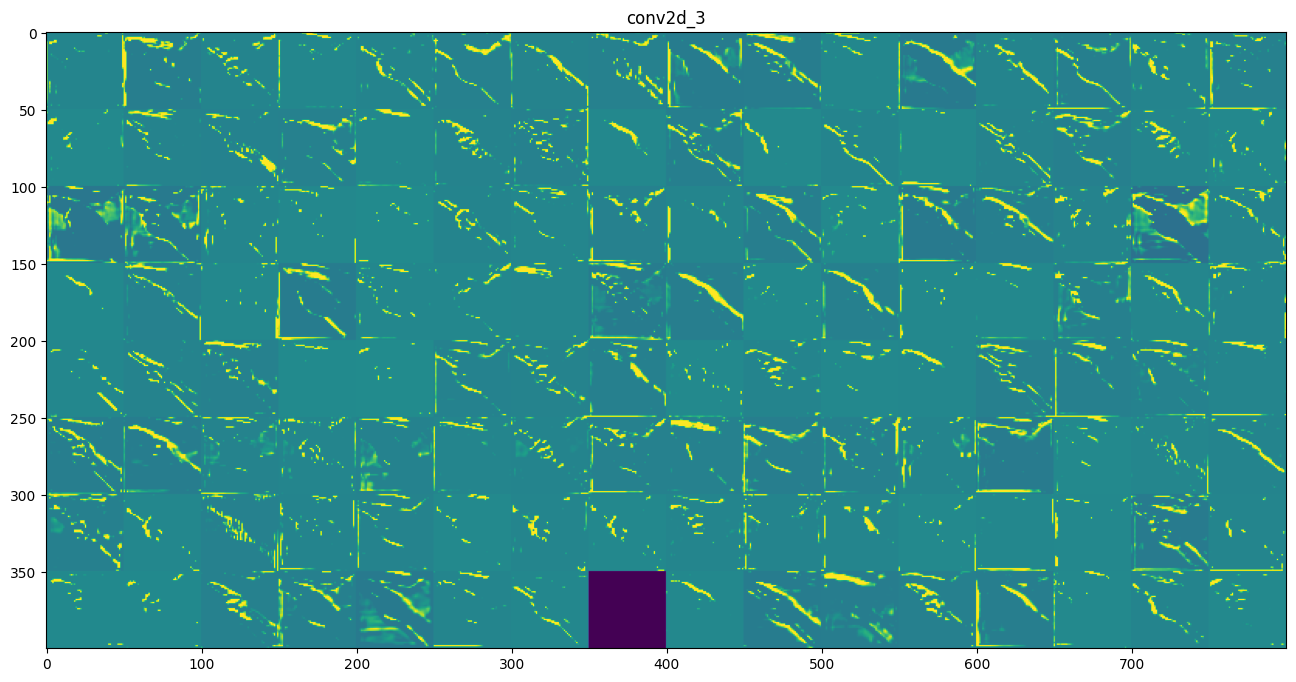

In [8]:
import cv2
import numpy as np
from keras.models import Model

# Load the image using OpenCV
image_path = 'c:/Users/Dell/Downloads/ASLdatasets/train/H/H1008.jpg'  # Replace with the path to your image
input_image = cv2.imread(image_path)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Preprocess the image (resize, normalize, etc.) to match the model input requirements
image_size = 100 # Replace with the required image size for your model
input_image = cv2.resize(input_image, (image_size, image_size))
input_image = input_image.astype('float32') / 255.0  # Normalize pixel values

# Reshape the image to match the model input shape
input_image = input_image.reshape(1, image_size, image_size, 3)  # Assuming 3 channels (RGB)

# Define the activation model to get intermediate layer outputs
layer_outputs = [layer.output for layer in model.layers[:6]]  # Extracting feature maps up to the 6th layer
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(input_image)

# Visualize the activations
layer_names = [layer.name for layer in model.layers[:6]]
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]  # Number of features in the feature map
    size = layer_activation.shape[1]  # Size of the feature map

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()


In [9]:
import cv2
import os

# Path to your dataset directory containing images
dataset_dir = 'C:/Users/Dell/Downloads/ASLdatasets/'

# Output directory to save black and white images
output_dir = 'C:/Users/Dell/Downloads/GSASLdatasets'
os.makedirs(output_dir, exist_ok=True)

# Iterate through each image in the dataset directory
for filename in os.listdir(dataset_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Select file types (adjust as needed)
        # Read the image using OpenCV
        img_path = os.path.join(dataset_dir, filename)
        image = cv2.imread(img_path)
        
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Save the black and white image
        output_path = os.path.join(output_dir, f"bw_{filename}")  # Save with a new name
        cv2.imwrite(output_path, gray_image)
